# PCA-sphereing

As our first example we compare a runs of gradient descent using a real $N = 8$ input breast cancer dataset, a description of which you can find [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).  Below we load in the data and run the function above (outputting results on the original, standard normalized, and PCA sphered input).

Now we run the comparison module.  For each run we found the largest steplength of the form $\alpha = 10^{-\gamma}$ for an integer $\gamma$ that produced adequate convergence.  Notice that in comparing these values below, that here we can use at least an order of magnitude larger steplength when going from the original, to standard normalized, to PCA sphered input.

In [43]:
# This code cell will not be shown in the HTML version of this notebook
# load in dataset
csvname = sup_datapath + 'breast_cancer_data.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input/output pairs
x = data[:-1,:]
y = data[-1:,:] 

# run comparison module above
alpha_orig = 10**(-2);  alpha_standard = 1; alpha_pca_sphered = 10; costname = 'softmax'; countname = 'counter';
max_its = 10
cost_histories,count_histories = compare_schemes(x,y,costname,countname,alpha_orig,alpha_standard,alpha_pca_sphered,max_its)

With the runs complete we can now plot the cost and misclassification histories for each run to visually examine and compare the progress of each run.  Examining the plot below we can see how both normalization schemes result in runs that converge much more rapidly than applying gradient descent to the raw data.  Furthermore, the run on PCA sphered input converges more rapidly than the run on standard normalized input.  We can examine this more closely by plotting the corresponding histories of just these two runs - which we do below.

<IPython.core.display.Javascript object>


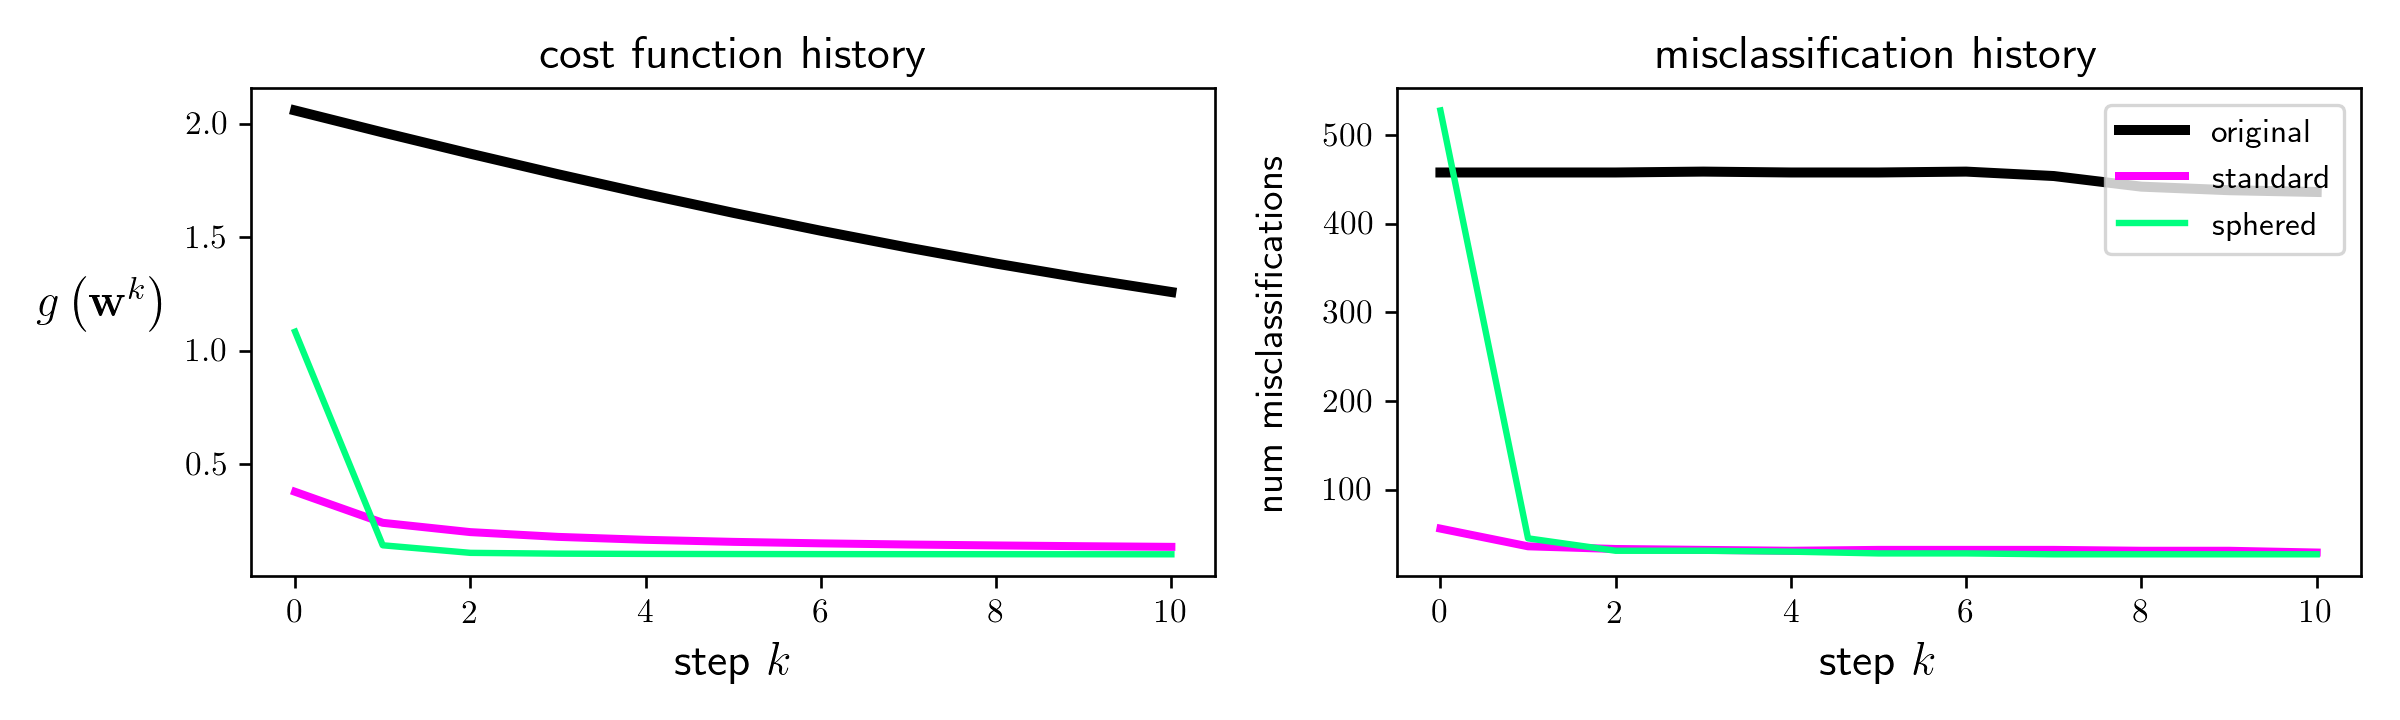

In [44]:
# This code cell will not be shown in the HTML version of this notebook
# plot cost and misclassification histories
classification_plotter.plot_cost_histories(cost_histories,count_histories,start = 0,labels = ['original','standard','sphered'])

Plotting the histories of just the runs on standard normalized and PCA sphered inputs, as is shown below, we can see just how much faster the run on the PCA sphered data converges than the corresponding run on the standard normalized data.  Examining the misclassification history in particular we can see that the PCA sphered data converges almost immediately.  

<IPython.core.display.Javascript object>


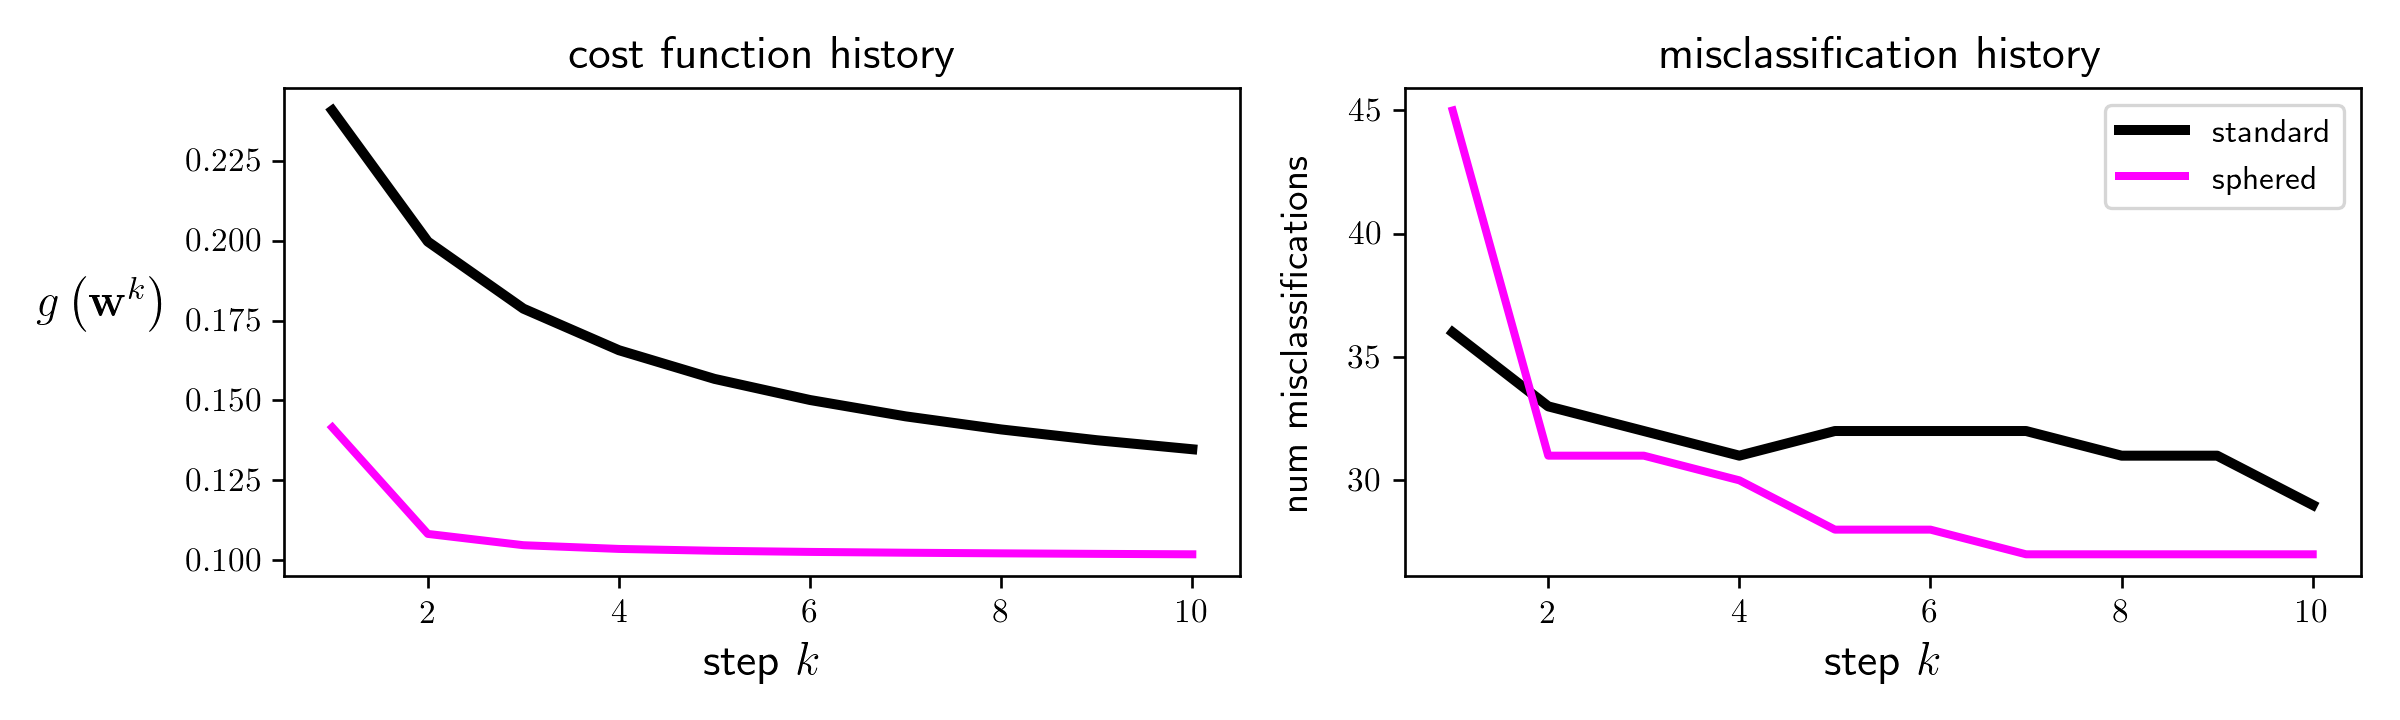

In [45]:
# This code cell will not be shown in the HTML version of this notebook
# plot cost and misclassification histories
classification_plotter.plot_cost_histories(cost_histories[1:],count_histories[1:],start = 1,labels = ['standard','sphered'])

## 9.6.5 Implementing regularized Least Squares costs in `Python`

To formulate a regularized Least Squares cost we can build directly on what we have seen in 5.1.3.  First off we have our implementation of the linear model.

In [ ]:
# compute linear combination of input point (no bias)
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

Next we have the same Least Squares functionality as shown previously - with one addition: a generic regularizer is added to the cost in line $7$.

In [ ]:
# an implementation of the least squares cost - with a regularizer
def least_squares(w,x,y,lam):    
    # compute the least squares cost
    cost = np.sum((model(x,w)-y)**2)/float(y.size)
    
    # add a regularizer
    cost += regularizer(w,lam)
    return cost

We can define `regularizer` as e.g., the $\ell_1$ norm as shown below.

In [ ]:
# the ell_1 regularizer
def regularizer(w,lam):
    return lam*np.sum(np.abs(w[1:]))

# regulared methods

In [ ]:
# compute linear combination of input point (no bias)
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

# the convex softmax cost function
def softmax_L1reg(w,x,y,lam,iter):
    # fetch mini-batch
    x_p = x[:,iter]
    y_p = y[:,iter]
    
    # compute standard softmax cost
    cost = np.sum(np.log(1 + np.exp(-y_p*model(x_p,w))))
    
    # add regularizer
    cost += lam*np.sum(np.abs(w[1:]))
    return cost/float(np.size(y_p))

# the convex softmax cost function
def softmax_L2reg(w,x,y,lam,iter):
    # fetch mini-batch
    x_p = x[:,iter]
    y_p = y[:,iter]
    
    # compute standard softmax cost
    cost = np.sum(np.log(1 + np.exp(-y_p*model(x_p,w))))
    
    # add regularizer
    cost += lam*np.sum((w[1:])**2)
    return cost/float(np.size(y_p))

# the counting cost function
def counting_cost(w,x,y,lam):
    cost = np.sum(np.abs(np.sign(model(x,w)) - y))
    return cost

#### <span style="color:#a50e3e;">Example 1: </span>  Predicting MPG in autombiles

Below we show the results of running the boosting procedure detailed above - using a Least Squares cost and Newton's method optimizer - and a slightly adjusted version of the *Auto-Mpg* dataset which can be [downloaded here](https://archive.ics.uci.edu/ml/datasets/Auto+MPG).  This dataset consists of a set of basic statistics on $398$ automobiles.  The input statistics are to be used to predict the Miles Per Galon (MPG) of each car.  The $N=6$ dimensional input features include: number of cylinders in the car's engine block (feature $1$), the total engine displacement (feature $2$), the horsepower of the car's motor (feature $3$), the weight of the car (feature $4$), the car's acceleration ability measured in seconds taken to accelerate to a benchmark speed from standstill (feature $5$), and the year the car was produced (feature $6$).  The final feature of the original dataset (called 'origin') was removed as no meaningful description of it could be found.

The result of running $M=6$ rounds of boosting is visualized in the top panel below.  This is a special kind of cost function history plot where the weight / feature added to the model at each round of boosting is shown along the horizontal axis (starting with the bias which has index $0$).  As we can see, the first two features found via boosting that most correlate with the output are the *car's weight* (the top feature, number $4$) and the production year of the car (the second most important feature, number $6$).  

<IPython.core.display.Javascript object>


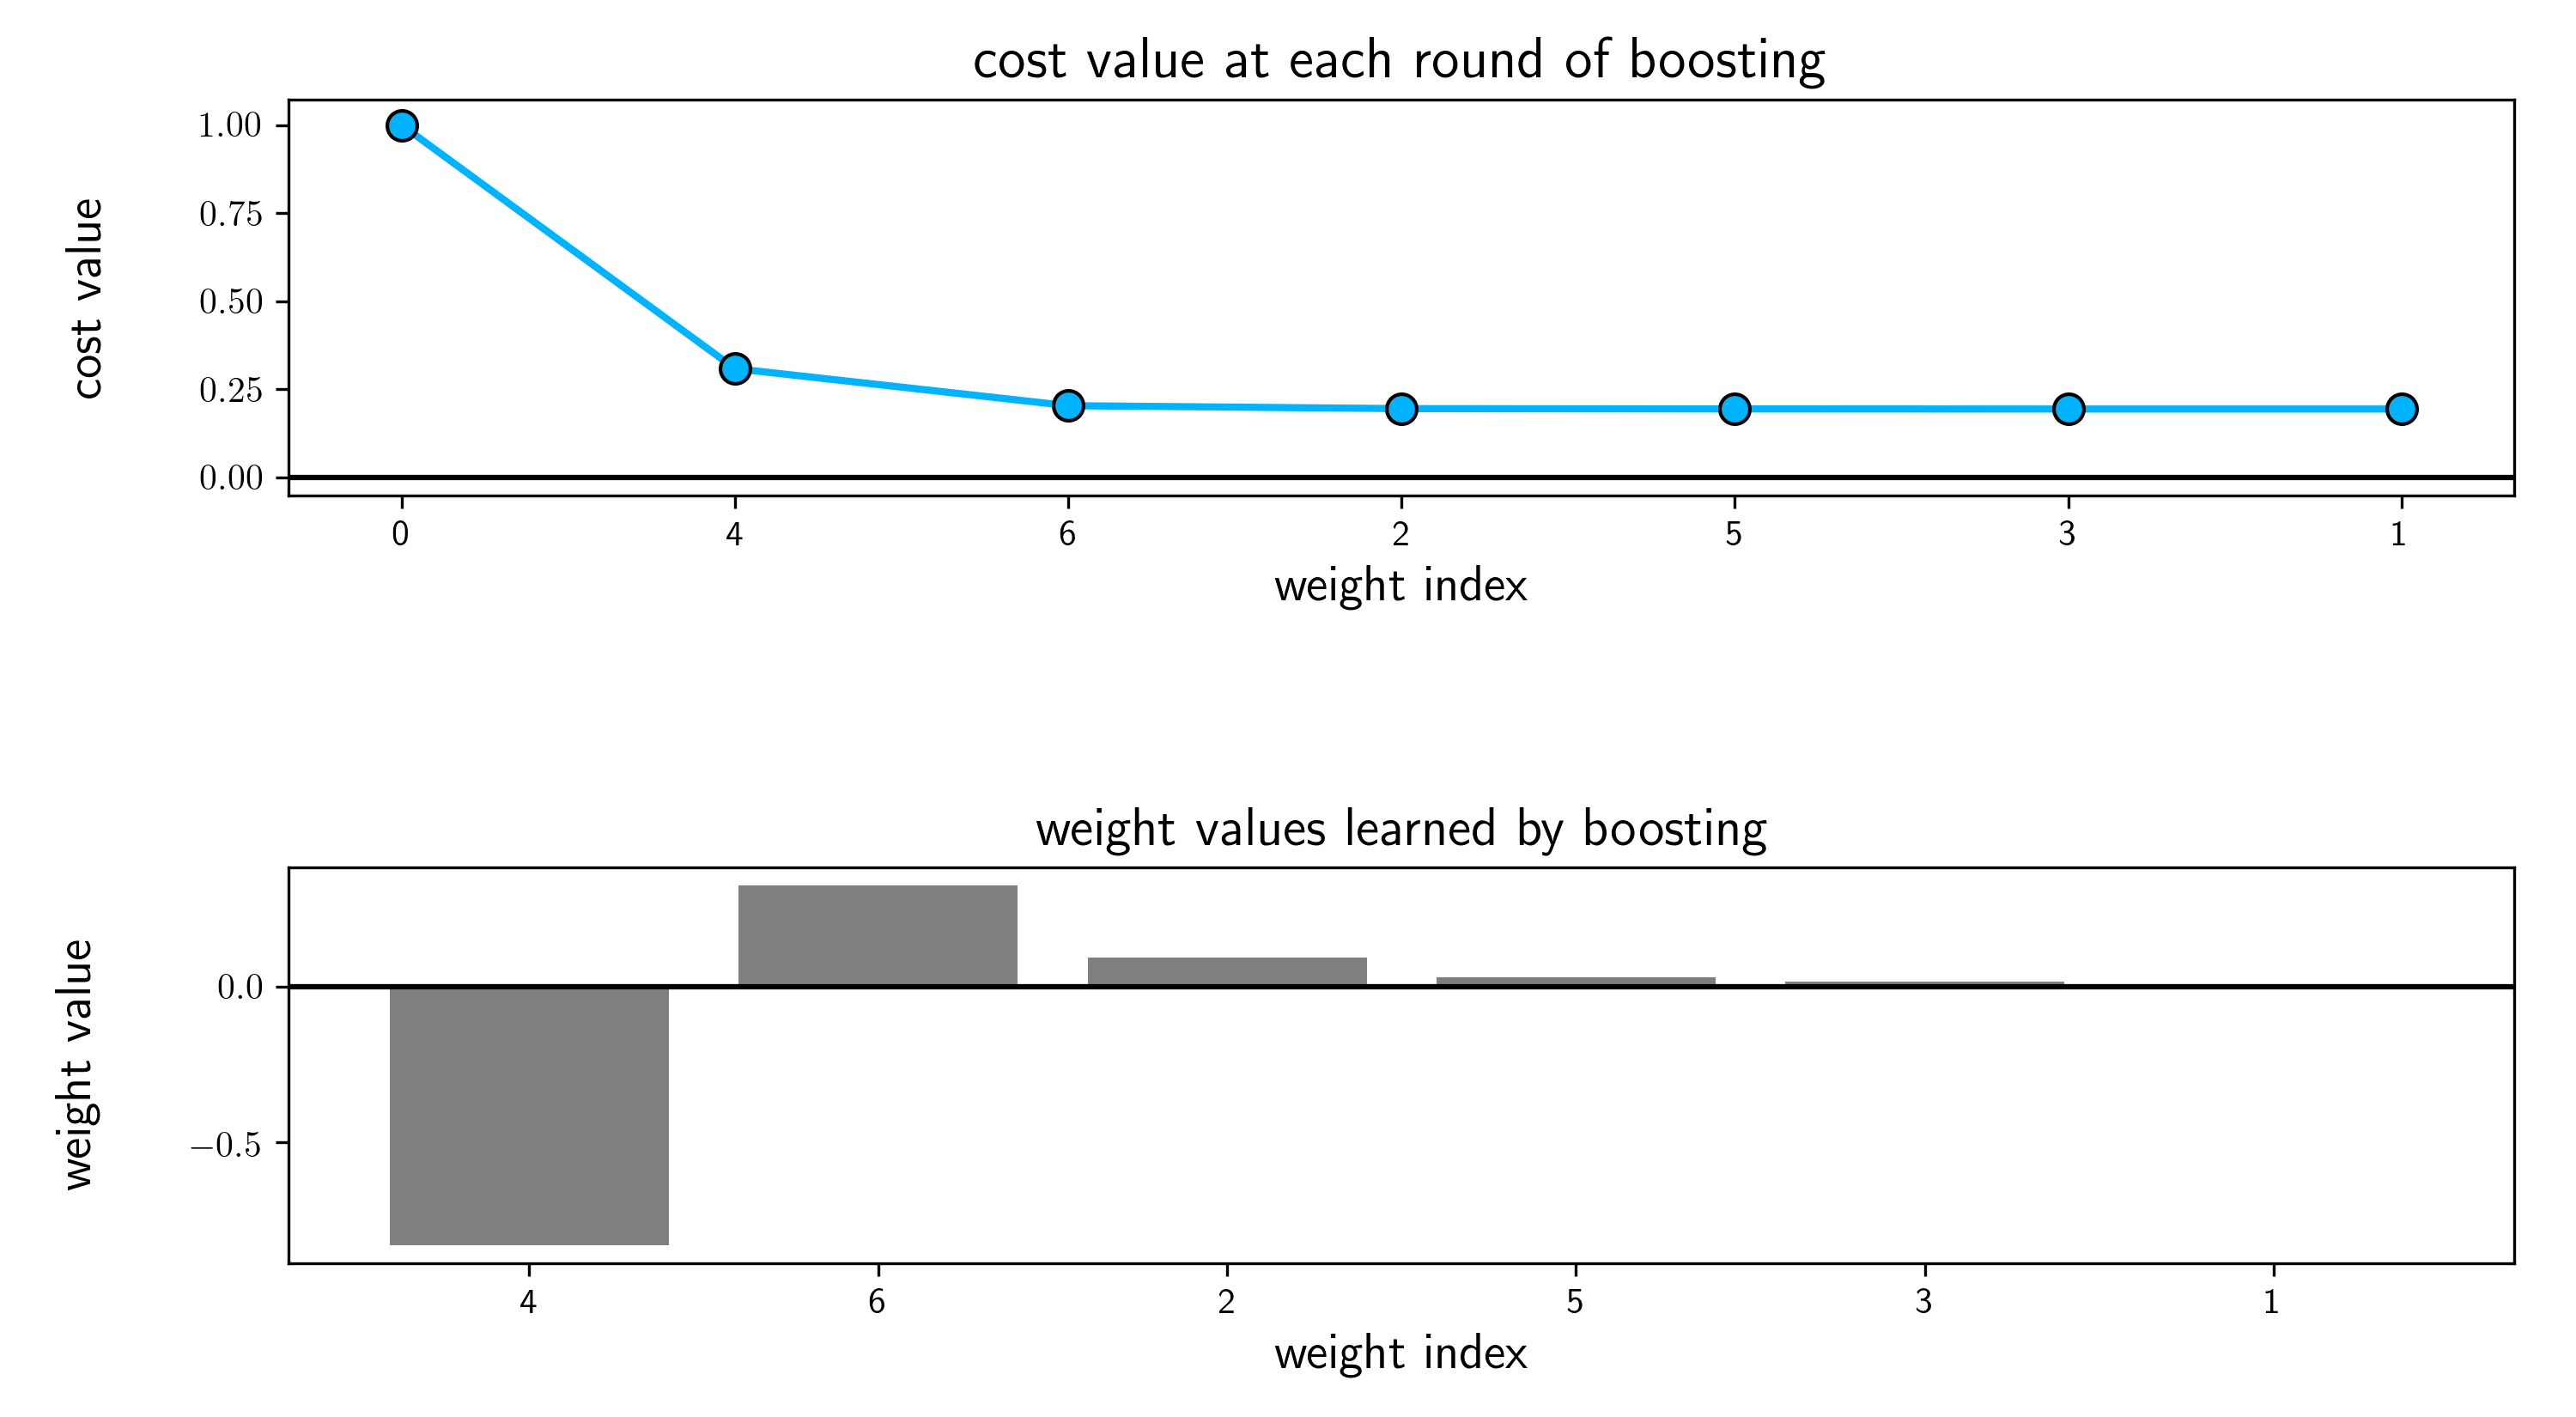

In [2]:
## This code cell will not be shown in the HTML version of this notebook
# load in data
csvname =  datapath + 'auto_data.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-2,:]
y = data[-1:,:] 

# import booster
mylib = superlearn.boost_lib.superlearn_setup.Setup(x,y)

# choose normalizer
mylib.choose_normalizer(name = 'standard')

# choose cost
mylib.choose_cost(name = 'least_squares')

# choose optimizer
mylib.choose_optimizer('newtons_method',max_its=1)

# run boosting
mylib.boost(num_rounds = 6)

# plot round history
mylib.plot_history()

In the bottom panel we show a histogram of the model weight *values* which tells us how each input feature correlates with the output.  It is not very surprising that *weight* is highly negatively correlated with *MPG*, as typically *heavy* cars will have *low* MPGs.  If we plot this normalized feature against the normalized MPG output - as shown below - we can clearly see this negative correlation in the data itself.

<IPython.core.display.Javascript object>


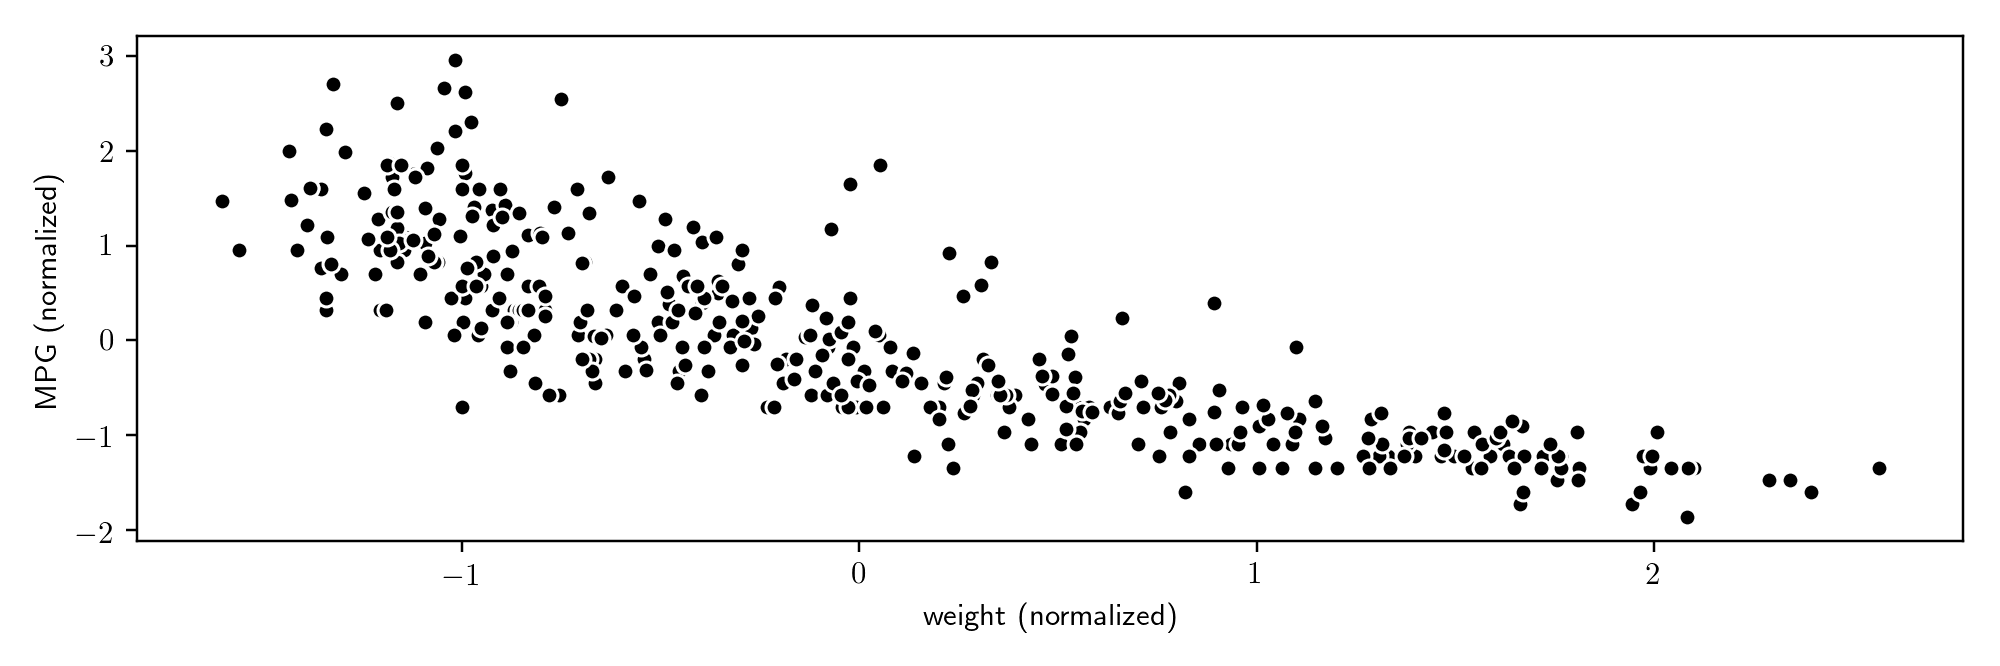

In [3]:
## This code cell will not be shown in the HTML version of this notebook
mylib.plot_regress(4,labels=['weight (normalized)','MPG (normalized)'])

We can also see in the bottom panel of the figure above that the *production year* is *positively* correlated with the output, which is sensible as well as *older* cars will often have *lower* MPG as well (due to parts wearing down, older technology, etc.,).  Plotting this normalized feature versus the normalized output - as shown below - we can see this positive correlation in the data itself.

<IPython.core.display.Javascript object>


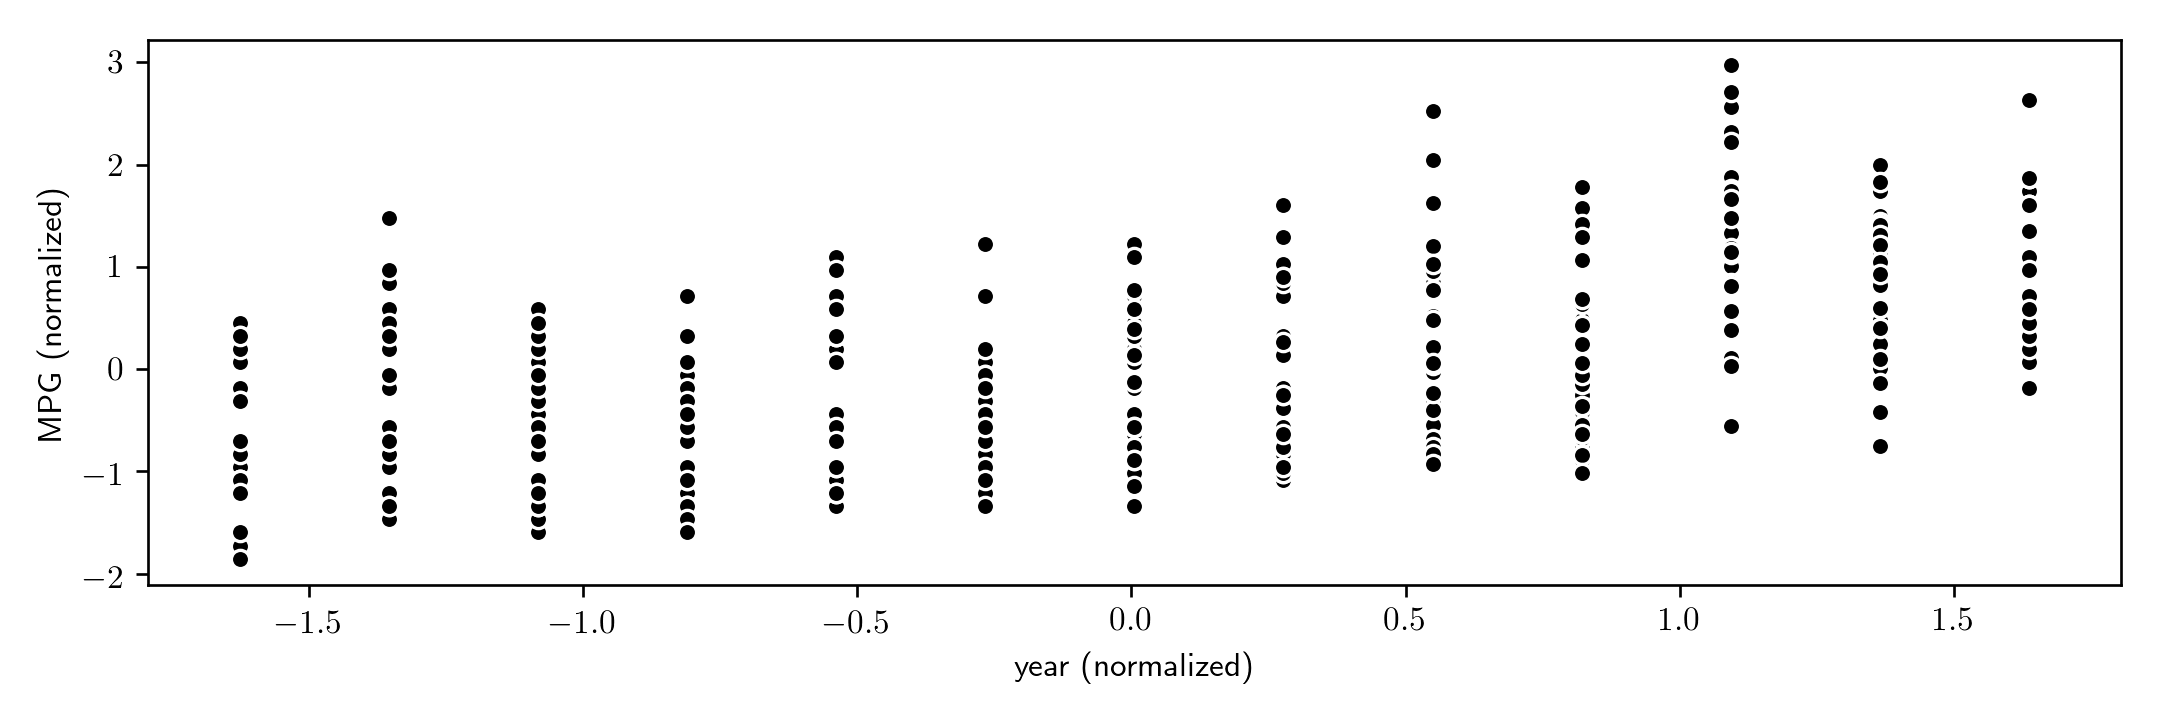

In [24]:
## This code cell will not be shown in the HTML version of this notebook
mylib.plot_regress(6,labels=['year (normalized)','MPG (normalized)'])